### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [Pandas profiling](#section304)<br/>
    - 3.5 [observations](#section305)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Grouping records based on age bucket](#section401)<br/>
    - 4.2 [Convert tenure from days to year](#section402)<br/>
- 5. [Identify patterns in the data](#section5)</br>
    - 5.1 [Age Trend](#section501)<br/>
    - 5.2 [Gender Vs No. of Friends](#section502)<br/>
    - 5.3 [Age Vs Friend count](#section503)<br/>
    - 5.4 [Gender Vs Likes received](#section504)<br/>
    - 5.5 [Age Vs Tenure](#section505)<br/>
- 6. [Analysis through questions](#section6)</br>
     - 6.1 [Age and Gender based analysis](#section601)<br/>
         - 6.1.1 [Which age group has more number of friends?](#section602)<br/>
         - 6.1.2 [which age group has initiated more friend request?](#section603)<br/>
         - 6.1.3 [Which age group received more likes?](#section604)<br/>
         - 6.1.4 [From which application more likes has been received (i.e. mobile or web)?](#section605)<br/>
         - 6.1.5 [To find number of likes received from Web & Mobile w.r.t Gender](#section606)<br/>
         - 6.1.6 [To find out which age group has received less number of likes](#section607)<br/>
         - 6.1.7 [To analyse from which application more Likes has been given w.r.t gender](#section610)<br/>
         - 6.1.8 [To analyse from which application and which age group have given more Likes w.r.t gender](#section611)<br/>
		 - 6.1.9 [To check number of passive users w.r.t gender](#section608)<br/>
		 - 6.1.10 [Different category of facebook users who did not give/receive any likes](#section609)<br/>
- 7. [Conclusion](#section7)<br/>

## 1. Problem Statement <a id=section1></a>

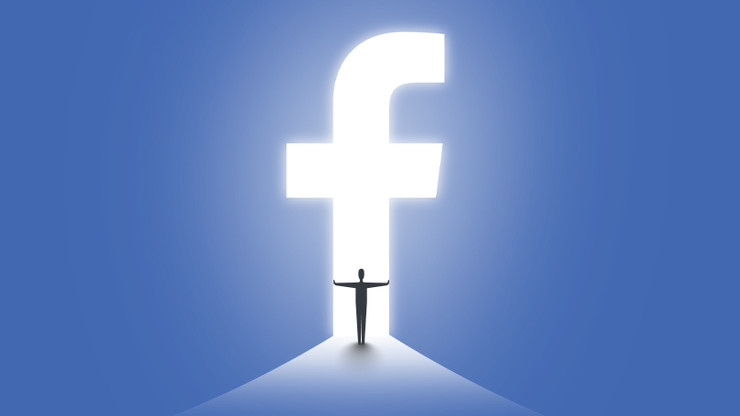

This dataset consist of sample data of facebook users with details like gender,age,DOB,tenure,friends,friends initiated and likes.

### 1.1. Introduction
This Exploratory Data Analysis is to analyse Facebook data based on the dataset provided. 

<a id=section101></a> 

### 1.2. Dataset <a id=section102></a>
Dataset consist of following columns :
- __Userid__    : "Unique ID of Facebook users"
- __Age__       : Age of user
- __dob_day__   : Day of birth
- __dob_year__  : Year of birth
- __dob_month__ : Month of birth
- __Gender__    : Male/Female
- __friend_count__  : Number of friends
- __friendships_initiated__ : users initiated friendship request
- __Likes__     : Likes given by user
- __Likes_received__ : Number of likes received from different users
- __mobile_likes__   : Likes given by user through mobile
- __mobile_likes_received__ : Likes received from mobile
- __www_likes__ : Likes given using web portal
- __www_likes_received__ : Likes received through web portal



### 2. Load the packages and data <a id=section2></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas_profiling
import seaborn as sns
from ipywidgets import widgets, interactive
from io import StringIO
%matplotlib inline

data = pd.read_csv('facebook.csv')

<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be considered or ignored so that it will be easy to transform in some way before they can be analyzed?

In [3]:
data.shape

(99003, 15)

<a id=section301></a>

In [4]:
data.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

<a id=section302></a>

In [5]:
data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


<a id=section303></a>

In [11]:
data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [15]:
data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

<a id=section304></a>

In [14]:
profile = pandas_profiling.ProfileReport(data)
profile.to_file(outputfile="pre_profile.html")

### To check skewness for all columns

In [93]:
d_gender = data.loc[~data.gender.isnull()] 
df_g = pd.DataFrame(d_gender)
df_g.skew(axis = 0, skipna = True)

userid                     0.000008
age                        1.418839
dob_day                    0.107615
dob_year                  -1.418839
dob_month                  0.030916
tenure                     1.530833
friend_count               6.059193
friendships_initiated      5.151264
likes                     11.024290
likes_received           112.016492
mobile_likes              14.161014
mobile_likes_received    107.473143
www_likes                 16.906265
www_likes_received       126.191932
dtype: float64

In [129]:
df_g[df_g.tenure==0] = np.nan
df_g.dropna(inplace=True)
df_g.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
age_group                0
tenure_year              0
user_status              0
dtype: int64

In [157]:
def gTOnum(gen):
    if(gen.gender=='male'):
        return 1
    else:
        return 0
df_g['gen_num'] = df_g.apply(gTOnum,axis=1)

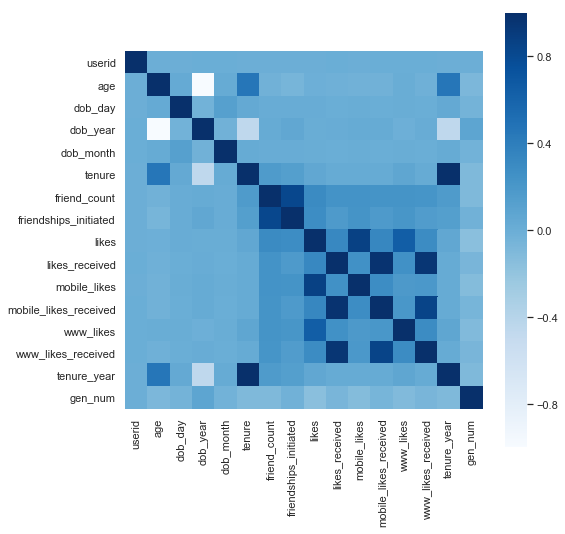

In [181]:
features_correlation = df_g.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

Age & Tenure,Tenure & (Friend count and Initiated,likes) are corelated with each other. 
Also number of likes received from mobile is more darker than WWW likes which implies that most of the likes is from mobile.

### 3.5 Observations <a id=section305></a>

As per profile we have following observation :
1. In this dataset minimun age is 13 and maximum is 113
2. In gender column there are 175 rows which has NaN value out of 99003 records.
3. mobile likes and WWW like received is positivly corelated with likes_received

All columns are positively skewed.

### 4. Data normalization <a id=section4></a>

In [133]:
d_gender = data.loc[~data.gender.isnull()]                            #To remove NA gender
d_gender.gender.value_counts()

male      58574
female    40254
Name: gender, dtype: int64

Out of 99006 records there are 175 records where Gender is missing, since no logic can be applied to derive gender based on different parameters. So this record can be ignored (as the missing ratio which is negligible)

<a id=section401></a>

In [134]:
df_g['age_group'] = pd.cut(df_g.age, [10,20,30,40,50,60,70,80,90,100,120],labels=['10-20','20-30','30-40','40-50','50-60','60-70',
                                                                                 '70-80','80-90','90-100','100+'])
df_g.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_year,user_status,gen_num
0,2094382.0,14.0,19.0,1999.0,11.0,male,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10-20,0.728767,Passive,1.0
1,1192601.0,14.0,2.0,1999.0,11.0,female,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10-20,0.016438,Passive,0.0
2,2083884.0,14.0,16.0,1999.0,11.0,male,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10-20,0.035616,Passive,1.0
3,1203168.0,14.0,25.0,1999.0,12.0,female,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10-20,0.254795,Passive,0.0
4,1733186.0,14.0,4.0,1999.0,12.0,male,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10-20,0.224658,Passive,1.0


<a id=section402></a>

In [136]:
tenure_valid = df_g.loc[~df_g.tenure.isnull()]
df_g['tenure_year'] = tenure_valid.tenure/365
df_g.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_year,user_status,gen_num
0,2094382.0,14.0,19.0,1999.0,11.0,male,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10-20,0.728767,Passive,1.0
1,1192601.0,14.0,2.0,1999.0,11.0,female,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10-20,0.016438,Passive,0.0
2,2083884.0,14.0,16.0,1999.0,11.0,male,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10-20,0.035616,Passive,1.0
3,1203168.0,14.0,25.0,1999.0,12.0,female,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10-20,0.254795,Passive,0.0
4,1733186.0,14.0,4.0,1999.0,12.0,male,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10-20,0.224658,Passive,1.0


## 5. Identify patterns in the data <a id=section5></a>

### 5.1  Age Trend <a id=section501></a>

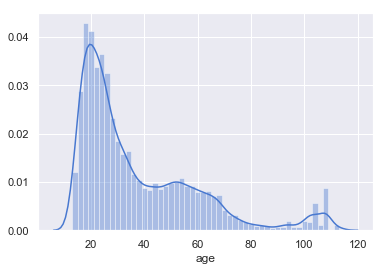

In [137]:
sns.set(color_codes=True)                                                # Plot a histogram of the respondents' ages (remove any NaN values)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(df_g["age"].dropna(), label="Age analysis");

Age : Right skewed distribution, most of the users are in the age group of 20-40 years.

Text(0.5, 1.0, 'Male')

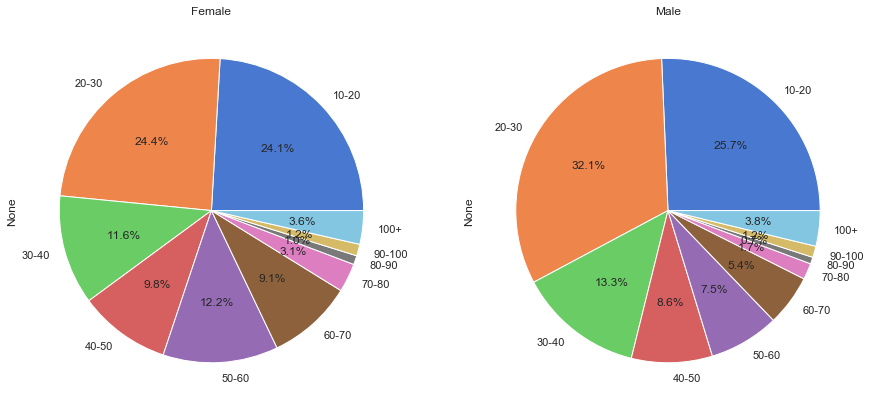

In [197]:
f1 = pd.DataFrame()
f1['female_per'] = (df_g[df_g.gen_num==0].groupby(['age_group']).gen_num.count()/df_g[df_g.gen_num==0].gen_num.count())*100
f1['male_per'] =   (df_g[df_g.gen_num==1].groupby(['age_group']).gen_num.count()/df_g[df_g.gen_num==1].gen_num.count())*100

f,ax = plt.subplots(1,2,figsize=(15,10))
f1.unstack()['female_per'].plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=False)
f1.unstack()['male_per'].plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=False)
ax[0].set_title('Female')
ax[1].set_title('Male')

As per analysis users age group b/w 10 to 40 years are more regardless of gender

### 5.2 Gender Vs No. of Friends <a id=section502></a>

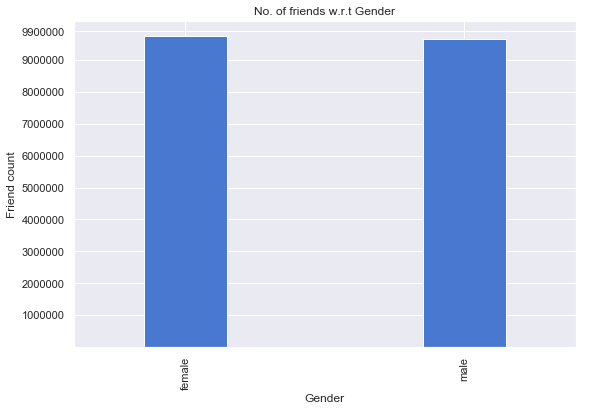

In [182]:
#df_g.groupby(['gender']).friend_count.agg('count')
g1 = df_g.loc[df_g.friend_count > 0].groupby(['gender']).friend_count.agg('sum').reset_index()
#print(g1)
g1.plot(figsize=(9,6),width=0.3,kind='bar',x='gender',legend=False,
        title="No. of friends w.r.t Gender",yticks=(1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,9900000));
plt.ylabel("Friend count")
plt.xlabel("Gender");

In this data set number of Males(58574) is more than Females(40254), as per above graph number of friends is more for females than males.

### 5.3 Age Vs Friend count <a id=section503></a>

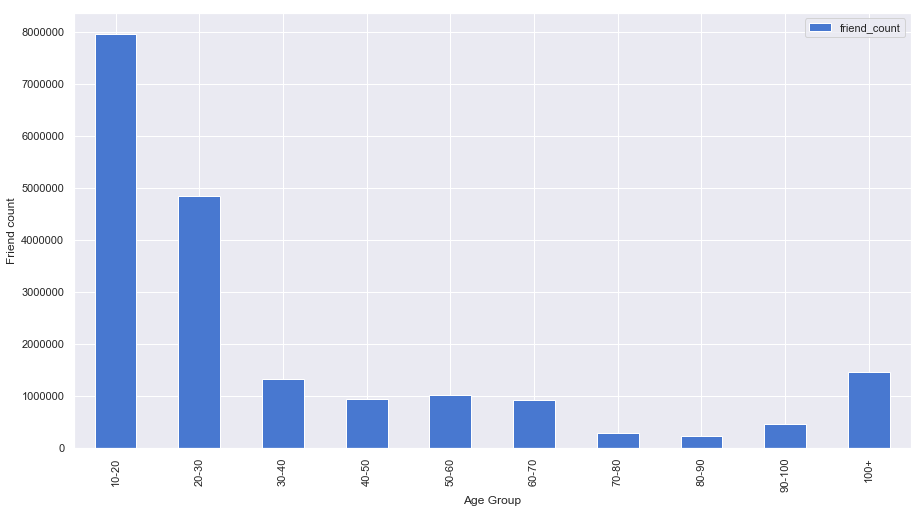

In [183]:
df_g.groupby(['age_group']).agg({'friend_count' : 'sum'}).plot(kind="bar",figsize=(15,8));
plt.xlabel("Age Group")
plt.ylabel("Friend count");

No. of friends is more b/w age group of 10-30 year bcz users are more b/w this age group.<br>
Note that users above 100years also have more number of friends.

### 5.4 Gender Vs Likes received <a id=section504></id>

,likes_received
,mean
gender,
female,297.657932
male,98.463945


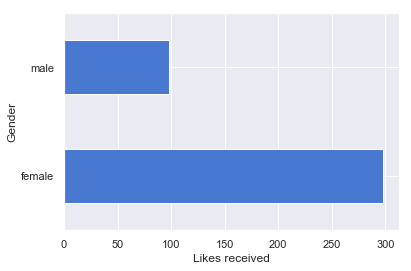

In [210]:
likes_received = df_g[df_g.likes_received > 0].groupby('gender').agg({'likes_received' : ['mean']})
likes_received.plot(kind="barh", legend=False);
plt.xlabel('Likes received')
plt.ylabel('Gender')
likes_received

Female has received more like than Males.

### 5.5 Age Vs Tenure <a id=section505></a>

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


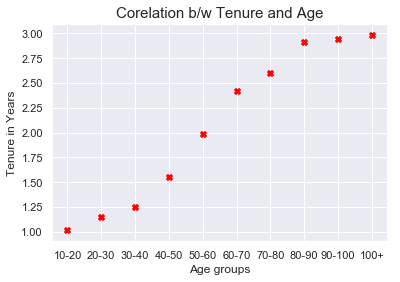

In [141]:
g5 = df_g.groupby('age_group').tenure_year.agg({'tenure_year' : 'mean'}).reset_index()
plt.scatter(x=g5['age_group'],y=g5['tenure_year'],marker='X',color='red')
plt.xlabel('Age groups')
plt.ylabel("Tenure in Years")
plt.title('Corelation b/w Tenure and Age',fontsize=15);

As per above graph Age and Tenue is positively corelated. All users have subscribed to facebook at the age of 10-20 years, so bcz of this trend is positively corelated.

## 6. Analysis through questions <a id=section6></a>

<a id=section601></a>

### 6.1 Age and Gender based analysis

### 6.1.1 Which age group has more number of friends? <a id=section602></a>

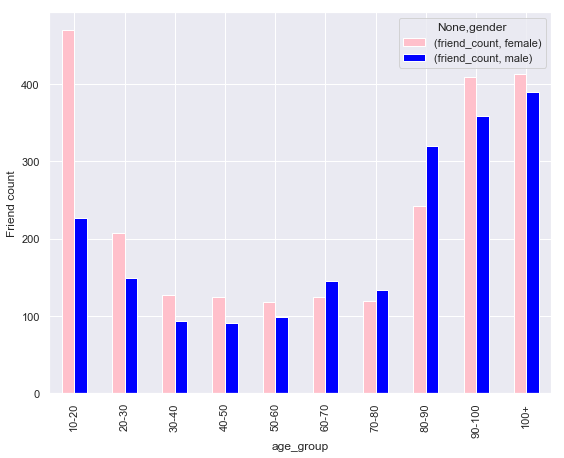

In [201]:
df_g['age_group'] = pd.cut(df_g.age, [10,20,30,40,50,60,70,80,90,100,120],labels=['10-20','20-30','30-40','40-50','50-60','60-70',
                                                                                 '70-80','80-90','90-100','100+'])
g2 = df_g.groupby(['age_group','gender']).agg({'friend_count' : 'mean'})
f = g2.unstack()
fig, ax = plt.subplots(figsize=(9,7))
f.plot(kind="bar",ax=ax,color=['pink','blue']);
plt.ylabel("Friend count");

As per analysis we have following observations

1. Female Age group 10-20 years have more friends than any others.
2. Male age group 80-90years have more friends than same age group of Females.
3. Interesting fact as per graph is on an average 100-110 years have more friends than 20-100 years age group

### 6.1.2 which age group has initiated more friend request?<a id=section603></a>

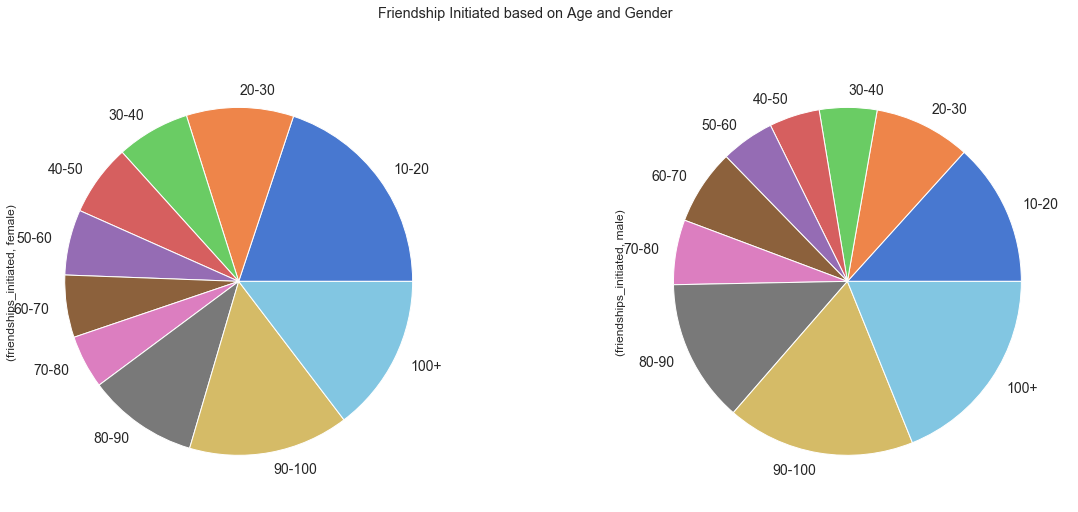

In [200]:
initiated = df_g[df_g.friendships_initiated > 0]
g4 = initiated.groupby(['age_group','gender']).agg({ 'friendships_initiated' : 'mean'})
#g4.unstack().plot(kind="bar",figsize=(13,7))
g4.unstack().plot.pie(subplots=True,figsize=(20,8),legend=False,title="Friendship Initiated based on Age and Gender",fontsize=14);

Above chart represents friends initiated on an average by each age group w.r.t gender.
    - Age group b/w 10 to 20 and 80+ years has initiated more friend request.
    - Female age group 10-20 has also initiated more friend request

### 6.1.3 Which age group received more likes? <a id=section604></a>

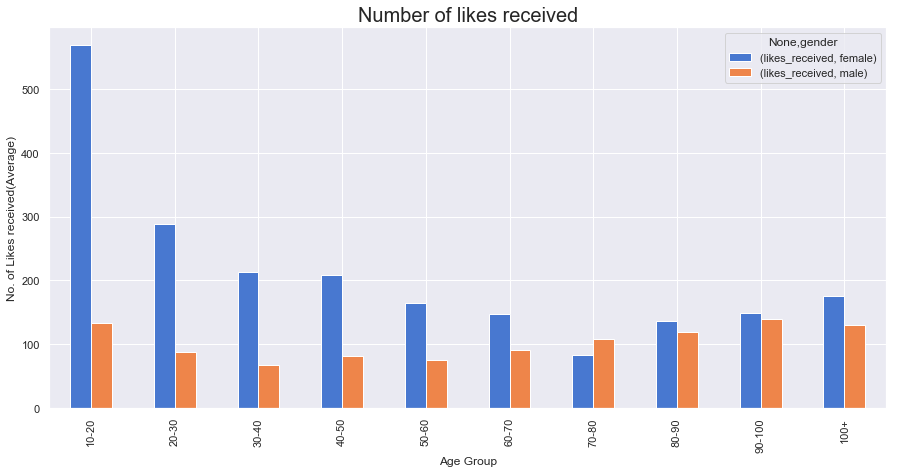

In [213]:
df_g.loc[(df_g.likes_received > 0)].groupby(['age_group','gender']).agg({'likes_received' : 'mean'}).unstack().plot(kind="bar",figsize=(15,7));
plt.title("Number of likes received",fontsize=20)
plt.xlabel("Age Group")
plt.ylabel("No. of Likes received(Average)");

As per above analysis 

    1.All age group of females received more likes than males except 70-80 years.
    2.In Female,on an average 10-20 years age group received more number of likes and 70-80 years age group received least   number of likes.

### 6.1.4 From which application more likes has been received (i.e. mobile or web)? <a id=section605></a>

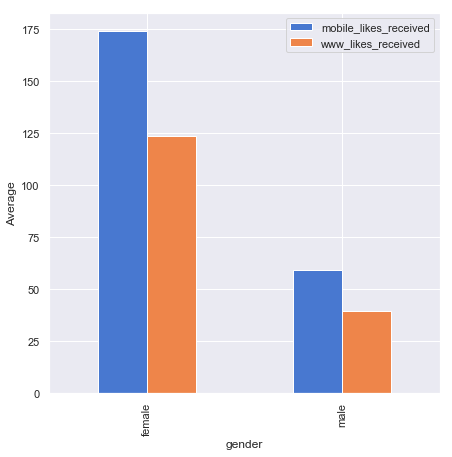

In [212]:
df_g[(df_g.likes_received > 0)].groupby('gender').agg({'mobile_likes_received' : 'mean','www_likes_received' : 'mean'}).plot(kind="bar",figsize=(7,7));
plt.ylabel('Average');

Both genders have received most of the likes from mobile app.<br>
Female has got more number of likes than Males regardless whether it web or mobile application. 

### 6.1.5 To find number of likes received from Web & Mobile w.r.t Gender <a id=section606></a>

In [146]:
g = widgets.Dropdown(
    options=list(df_g.gender.unique()),
    description='Gender:',
)
def plotgraph(gen):
    if(gen=='All'):
        df_g[(df_g.likes_received > 0)].groupby(['age_group','gender']).agg({'mobile_likes_received' : 'mean','www_likes_received' : 'mean'}).unstack().plot(kind="bar",figsize =(10,7))
    else:
        df_g[(df_g.likes_received > 0) & (df_g.gender==gen)].groupby(['age_group']).agg({'mobile_likes_received' : 'mean','www_likes_received' : 'mean'}).plot(kind="bar",figsize =(10,7))

interactive(plotgraph, gen=g)

interactive(children=(Dropdown(description='Gender:', options=('male', 'female'), value='male'), Output()), _d…

All age group of females or males are receiving more likes from mobile app when compared to web application

### 6.1.6 To find out which age group has received less number of likes <a id=section607></a>

In [147]:
df_g.loc[(df_g.likes_received > 0)].groupby(['age_group'])['mobile_likes_received'].mean().sort_values().head(3)

g = widgets.Dropdown(
    options=list(df_g.gender.unique()),
    description='Gender:'
)
def showleastliked(gen):    
        f,ax = plt.subplots(1,2,figsize=(15,6));
        print(df_g.loc[(df_g.likes_received > 0) & (df_g.gender==gen)].groupby(['age_group'])['mobile_likes_received'].mean().sort_values().head(3).plot(kind="bar",figsize=(10,6),ax=ax[0],color='purple'));
        plt.ylabel("No of likes received");
        print(df_g.loc[(df_g.likes_received > 0) & (df_g.gender==gen)].groupby(['age_group'])['www_likes_received'].mean().sort_values().head(3).plot(kind="bar",figsize=(10,6),ax=ax[1],color='brown'));
        ax[0].set_title('Mobile');
        ax[1].set_title('Web');

interactive(showleastliked, gen=g)

interactive(children=(Dropdown(description='Gender:', options=('male', 'female'), value='male'), Output()), _d…

### 6.1.7 To analyse from which application more Likes has been given w.r.t gender <a id=section610></a>

Text(0.5, 0, 'Gender')

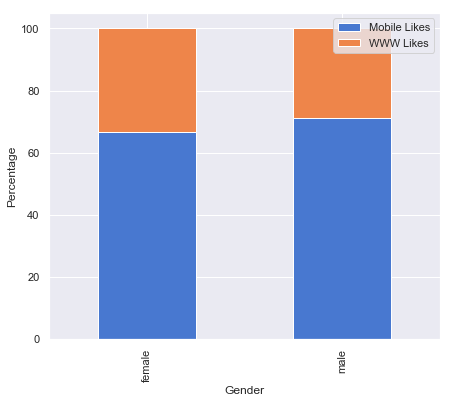

In [205]:
newDF = pd.DataFrame()
newDF['Mobile Likes']=(df_g.groupby(['gender']).mobile_likes.sum()/df_g.groupby(['gender']).likes.sum())*100
newDF['WWW Likes']=(df_g.groupby(['gender']).www_likes.sum()/df_g.groupby(['gender']).likes.sum())*100
newDF.plot(kind="bar",stacked=True,figsize=(7,6));
plt.ylabel("Percentage")
plt.xlabel("Gender")

### 6.1.8 To analyse from which application and which age group have given more Likes w.r.t gender <a id=section611></a>

In [153]:
g = widgets.Dropdown(
    options=list(df_g.gender.unique()),
    description='Gender:',
)
def plotgraph(gen):
    newDF = pd.DataFrame()
    newDF['m_like']=(df_g[df_g.gender==gen].groupby(['age_group']).mobile_likes.sum()/df_g[df_g.gender==gen].groupby(['age_group']).likes.sum())*100
    newDF['w_like']=(df_g[df_g.gender==gen].groupby(['age_group']).www_likes.sum()/df_g[df_g.gender==gen].groupby(['age_group']).likes.sum())*100
    #print(newDF)
    newDF.plot(kind="bar",stacked=True, figsize=(10,6));
    plt.ylabel('Percentage')
    plt.xlabel("Age Group");
interactive(plotgraph, gen=g)

interactive(children=(Dropdown(description='Gender:', options=('male', 'female'), value='male'), Output()), _d…

- As per analysis from 6.1.7 & 6.1.8 more of like is given from mobile application than web application irrespective of gender.
- __65-70%__ of likes was given from Mobile application
- Age group of __60 to 80 years__ users are using more of Web than Mobile.

### 6.1.9 To check number of passive users w.r.t gender <a id=section608></a>

In [148]:
def userstatus(rows):
    if((rows.friend_count!=0) & (rows.likes!=0) & (rows.likes_received != 0)):
        return 'Active'
    else:
        return 'Passive'
df_g['user_status'] = df_g.apply(userstatus, axis=1)

Grouping users as Inactive if they have not liked any posts and also not received any likes from others and also having zero friends.

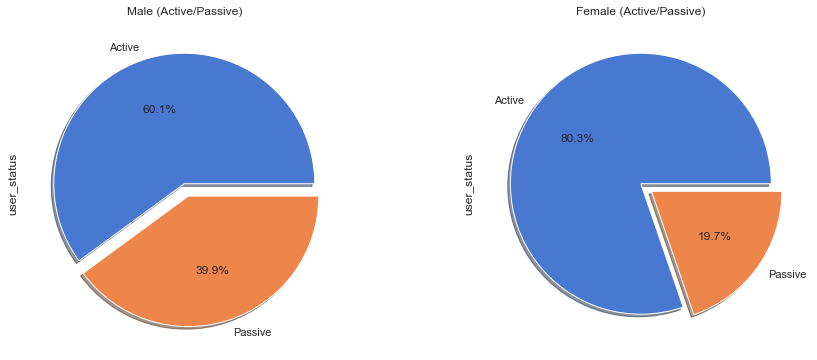

In [149]:
f,ax = plt.subplots(1,2,figsize=(15,6))

df_g['user_status'][df_g['gender']=='male'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_g['user_status'][df_g['gender']=='female'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Male (Active/Passive)')
ax[1].set_title('Female (Active/Passive)');

Above pie chart represents that there are 39.9% and 19.7% of Passive users of male and female respectively. Parameters considered for Passive status is No. of friends,likes and likes_received is 0

### 6.1.10 Different category of facebook users who did not give/receive any likes <a id=section609></a>

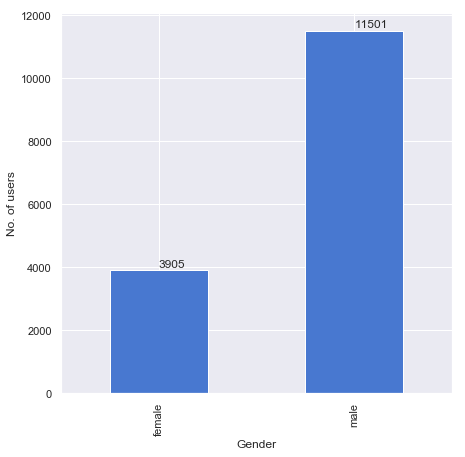

In [214]:
f = df_g.loc[(df_g.friend_count>=0) & (df_g.likes_received==0) & (df_g.likes==0)].groupby('gender').gender.count()
f.plot(kind="bar",figsize=(7,7));
a=0
for i in f:
    plt.text(a,(i+100),i)
    a=a+1
plt.ylabel("No. of users")
plt.xlabel("Gender");

Above graph represents the Facebook users who did not give even one like to other posts and also not received even one like from others but having atleast on friend, this implies that user can be using facebook platform for marketing/Advertising/Bulk posting/Promotions to group of users. As per analysis there are more males than Females in this category.

## 7. Conclusion <a id=section7></a>

   - Age group b/w 20-40 users are more active than othr age groups, FB need to attract other age group users as well in order to improve their business.
   - In this given sample Male users are more than female users, FB need to strategies on attrating more female users.
   - As per analysis more the age lower the friends count, in order to improve friends count FB to work on more powerful and accurate friend recommendation engine.
   - 10 to 20 years age group is more social as they have initiated more friend request than any other age group, FB should pull in other age groups for building network by giving suggestion on friend they may know.
   - __Likes Received__: Female users have received more likes than male users,which inturn projects that either males are not posting much data or failed to get likes. Some kind guidelines or steps to be provided on how to post a relevant structured data to get more number of likes.
   - Regardless of gender, users are extensively using mobile application when compared to web application. FB need to constantly improve mobile app as it is widely used and also more effort is required to improve Web application and make it as powerful as mobile app, so that all users can easily switchover b/w apps as and when required.